# Crawl News and Sentiment Analysis
The crawling process was done using news-watch. Written by Okky Maburi.

The Lexicon for Sentiment analysis was taken from https://github.com/onpilot/sentimen-bahasa. Written by onpilot.

The transformer model (trained with financial news) for Sentiment analysis was taken from https://huggingface.co/intanm/indonesian_financial_sentiment_analysis_10. Written by intanm.


In [ ]:
#Mounting Google Drive into Google Collab Environment
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Installing News-Watch Package
#!pip install news-watch
!pip install pandas matplotlib nltk PySastrawi --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
#Importing packages needed for basic analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#News Data Scrapper: News-Watch
#!newswatch -k "ihsg" -sd 2025-02-01 #EDIT: Keywords and Date of scrapping program

Traceback (most recent call last):
  File "/usr/local/bin/newswatch", line 8, in <module>
    sys.exit(cli())
             ^^^^^
  File "/usr/local/lib/python3.11/dist-packages/newswatch/cli.py", line 90, in cli
    asyncio.run(run_main(args))
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 641, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.11/dist-packages/newswatc

In [ ]:
# Load dataset
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/prospera-da/news-analysis-2/refs/heads/main/data/news-watch-ihsg.arus%20modal-sd-2024-01.csv", delimiter=",") #EDIT: Based on GitHub Link (Raw View Link)

# Data preprocessing
df = df.drop_duplicates(subset=["keyword", "source", "link"])

# Display the DataFrame
display(df)

,title,publish_date,author,content,keyword,category,source,link
0,Wadirut Bank Mandiri Sebut Bisnis Perbankan RI...,2024-02-29 11:58:00,Anisa Indraini -detikFinance,Jakarta\n-\nWakil Direktur Utama PT Bank Mandi...,NPL,detikFinance,detik.com,https://finance.detik.com/moneter/d-7217785/wa...
1,Bank Mandiri Jaga Pertumbuhan Aset Pakai Strat...,2025-02-08 11:30:00,"Teti Purwanti,CNBC Indonesia","Jakarta, CNBC Indonesia\n- PT Bank Mandiri (Pe...",NPL,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202502101...
2,Investor Waspadalah! Daya Beli Warga RI dalam ...,2024-11-12 06:01:00,"Emanuella Bungasmara Ega Tirta,CNBC Indonesia",Pasar keuangan Indonesia mencatat kinerja meng...,arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024111...
3,OJK Cabut Izin BPR Kencana Cimahi!,2024-12-17 09:14:00,Herdi Alif Al Hikam -detikFinance,Jakarta\n-\nIzin Usaha PT Bank Perkreditan Rak...,likuiditas bank,detikFinance,detik.com,https://finance.detik.com/moneter/d-7690057/oj...
4,"Ramai-Ramai Asing Kabur ke China, Dana Rp 10 T...",2024-09-30 06:20:00,"Revo M,CNBC Indonesia","Jakarta, CNBC Indonesia -\nArus dana asing ter...",arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024092...
...,...,...,...,...,...,...,...,...
3965,"Dolar AS Berada di Zona Merah, Rupiah Berotot",2024-08-29 10:04:00,Sylke Febrina Laucereno -detikFinance,Jakarta\n-\nDolar AS hari ini berada di zona m...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/bursa-dan-valas/d-75...
3966,Simak Daftar Kurs Rupiah Hari Ini 24 Januari d...,2025-01-24 10:30:00,"Agustinus Rangga Respati,Aprillia Ika","JAKARTA , KOMPAS.com - Nilai tukar rupiah terh...",nilai tukar rupiah,Kompas.com/Money/Keuangan,kompas.com,http://money.kompas.com/read/2025/01/24/103000...
3967,Sederet PR Pemerintahan Baru RI di Sektor Ekonomi,2024-05-02 13:25:00,Ilyas Fadilah -detikFinance,Jakarta\n-\nPemerintahan baru Indonesia yang d...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...
3968,Industri Penerbangan Indonesia Masih Tidak Bai...,2024-12-31 11:26:00,Heri Purnomo -detikFinance,Jakarta\n-\nIndonesia National Air Carriers As...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/industri/d-7710985/i...


In [ ]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd


import nltk
nltk.download('stopwords')

from nltk import ngrams
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df_feature = df.drop_duplicates(subset=["keyword", "source", "link"])

df_feature["title"] = df_feature["title"].fillna("")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing Text

The function preprocess_text(text) performs multiple steps to prepare the text for n-gram extraction:


*   Case Folding: Converts all text into lowercase to ensure consistency.
*   Number Normalization: Uses a regex to combine numbers with thousand separators (e.g., "1,000" or "1.000") into a single numeric string, removing extra characters.
*   Punctuation Removal: Removes punctuation that might interfere with tokenizing words. The regex carefully avoids removing punctuation part of numeric values.
*   Whitespace Normalization: Collapses multiple spaces into a single space.
Removing Unwanted Phrases: Uses a list of phrases (such as "advertisement" or "scroll to continue with content") that are deemed unnecessary for analysis. These phrases are removed using case-insensitive regex matching.
*   Date Removal: Removes date patterns specific to Indonesian date representations (days like “senin” or months like “januari”) with separate regex patterns.
*   Tokenization: Splits the cleaned text on whitespace.
*   Stopword Removal: Filters out common Indonesian stopwords using the nltk stopwords list.
*   Stemming: Applies the Sastrawi stemmer to reduce each token to its root form, which is useful for grouping different forms of the same word together.

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words("indonesian"))


def preprocess_text(text):
    # Case folding: convert text to lowercase
    text = text.lower()

    # Combine numbers with thousand separators
    text = re.sub(
        r"\b(\d{1,3}(?:[.,]\d{3})+)\b",
        lambda m: m.group(0).replace(".", "").replace(",", ""),
        text,
    )

    # Remove punctuation using regex .,?!:;
    # This pattern matches punctuation that is not part of a number
    text = re.sub(r"(?<!\d)[^\w\s]|[^\w\s](?!\d)", " ", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text)

    # Remove the specified unwanted phrases
    unwanted_phrases = [
        "advertisement",
        "scroll to continue with content",
        "cnbc indonesia",
        "kontan co id",
        "jakarta",
        "year on year",
        # add more here
    ]
    for phrase in unwanted_phrases:
        # Use regex for case-insensitive replacement and to handle extra spaces
        pattern = re.compile(re.escape(phrase), re.IGNORECASE)
        text = pattern.sub("", text)

    # Remove date patterns
    date_patterns = [
        # Matches "selasa 5 11 2024", "senin 4 11", "5 11 2024", "5 11"
        r"\b(?:(?:senin|selasa|rabu|kamis|jumat|sabtu|minggu)\s+)?\d{1,2}\s+\d{1,2}(?:\s+\d{2,4})?\b",
        # Matches "januari 2024", "september 2024"
        r"\b(?:januari|februari|maret|april|mei|juni|juli|agustus|september|oktober|november|desember)\s+\d{4}\b",
    ]
    for pattern in date_patterns:
        text = re.sub(pattern, "", text)

    # Tokenize the text by splitting on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens


def generate_ngrams(tokens, n):
    # Generate and join n-grams in one step
    ngrams_list = list(ngrams(tokens, n))
    return [" ".join(ngram) for ngram in ngrams_list]

Generating N-grams

The function generate_ngrams(tokens, n) uses nltk’s ngrams to generate a list of n-grams from a list of tokens. An n-gram is a contiguous sequence of n items from a given sample of text. For example:

*   Bigrams: n = 2, e.g., "word1 word2"
*   Trigrams: n = 3, e.g., "word1 word2 word3"

In [ ]:
# Apply preprocessing and generate bigrams and trigrams
df["tokens"] = df["content"].apply(preprocess_text)
df["bigrams"] = df["tokens"].apply(lambda x: generate_ngrams(x, 2))
df["trigrams"] = df["tokens"].apply(lambda x: generate_ngrams(x, 3))

# Flatten lists and count frequencies
bigram_counts = Counter(bigram for sublist in df["bigrams"] for bigram in sublist if bigram.strip())
trigram_counts = Counter(trigram for sublist in df["trigrams"] for trigram in sublist if trigram.strip())

bigram_df = pd.DataFrame(
    bigram_counts.items(), columns=["bigram", "count"]
).sort_values(by="count", ascending=False)
trigram_df = pd.DataFrame(
    trigram_counts.items(), columns=["trigram", "count"]
).sort_values(by="count", ascending=False)

print("Top 10 Bigrams:")
print(bigram_df.head(10))

print("\nTop 10 Trigrams:")
print(trigram_df.head(10))

Top 10 Bigrams:
               bigram  count
78         suku bunga   4832
669          dolar as   4611
664       nilai tukar   3888
998    bank indonesia   2588
1302        mata uang   2532
665      tukar rupiah   2318
148    tumbuh ekonomi   1724
3001          the fed   1649
536       harga saham   1574
790   amerika serikat   1523

Top 10 Trigrams:
                 trigram  count
728   nilai tukar rupiah   2285
591   indeks harga saham   1185
592   harga saham gabung   1173
593    saham gabung ihsg   1093
868   amerika serikat as   1000
2913      suku bunga acu    916
82      turun suku bunga    883
2017   bank indonesia bi    837
3950  mangkas suku bunga    695
5513   nilai tukar dolar    627


<BarContainer object of 10 artists>

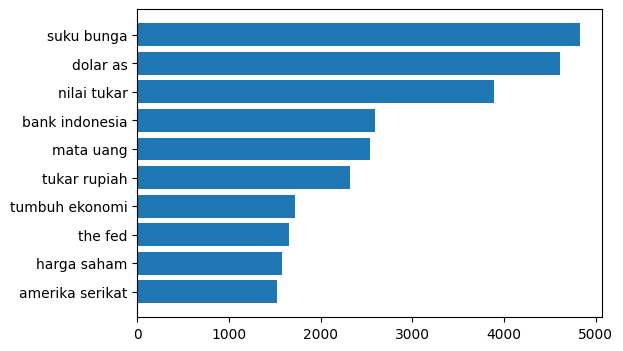

In [ ]:
# Plotting the top 10 bigrams
plt.figure(figsize=(6, 4))
plt.barh(
    bigram_df["bigram"].head(10).iloc[::-1],
    bigram_df["count"].head(10).iloc[::-1],
)

<BarContainer object of 10 artists>

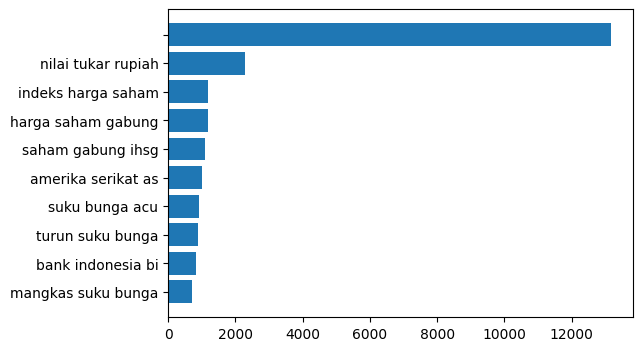

In [ ]:
# Plotting the top 10 trigrams
plt.figure(figsize=(6, 4))
plt.barh(
    trigram_df["trigram"].head(10).iloc[::-1],
    trigram_df["count"].head(10).iloc[::-1],
)

# Method 1: Using External Dictionary for Sentiment Analysis Classification

In [ ]:
#Install NLTK package
!pip install nltk

In [ ]:
#Importing several tools from NLTK needed for Lexicon Based Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import requests
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Utilizing NLTK VADER using custom Lexicon

# Download the file into your Colab session
!wget -O _json_sentiwords_id.txt "https://raw.githubusercontent.com/prospera-da/news-analysis-2/refs/heads/main/data/_json_sentiwords_id_simple.txt"

#Create Sentiment Analysis Analyzer
sia2 = SentimentIntensityAnalyzer()

#Cleaning Default Lexicon Provided from VADER
sia2.lexicon.clear()

#Opening Lexicon from sentiwords_id file
with open('/content/_json_sentiwords_id.txt') as f:
    data2 = f.read()

#Updating Lexicon for VADER Analysis from sentiwords_id
senti = json.loads(data2)
sia2.lexicon.update(senti)

#Show Example of Lexicon from sentiwords_id
print(reprlib.repr(sia2.lexicon))

--2025-05-31 18:55:08--  https://raw.githubusercontent.com/prospera-da/news-analysis/refs/heads/main/data/_json_sentiwords_id_simple.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26666 (26K) [text/plain]
Saving to: ‘_json_sentiwords_id.txt’

_json_sentiwords_id 100%[===================>]  26.04K  --.-KB/s    in 0.003s  

2025-05-31 18:55:08 (8.65 MB/s) - ‘_json_sentiwords_id.txt’ saved [26666/26666]

{'abadi': 1, 'absen': -1, 'abu-abu': -1, 'acuh': 1, ...}


In [ ]:
#Creating a Function for Sentiment Analysis
def categorize_sentiment_senti(news: str) -> str:
    """
    Categorize the sentiment of a news title as 'Positive', 'Negative', or 'Neutral'
    based on the compound score of a sentiment analyzer (sia2).
    """
    compound_score = sia2.polarity_scores(news)["compound"]

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# Showcase usage with a single sentence and score display
sentence = "IHSG Jatuh, 4 Saham Ini Diam-diam Menggila"
sentiment = categorize_sentiment_senti(sentence)
scores = sia2.polarity_scores(sentence)

print(f"Sentence: {sentence}")
print(f"Sentiment: {sentiment}")
print(f"Scores: {scores}")

Sentence: IHSG Jatuh, 4 Saham Ini Diam-diam Menggila
Sentiment: Negative
Scores: {'neg': 0.444, 'neu': 0.333, 'pos': 0.222, 'compound': -0.25}


In [ ]:
# Adding a new column for SENTI-based classification labels
df['sentiment_dict'] = df['title'].apply(lambda news: categorize_sentiment_senti(news))
df

,title,publish_date,author,content,keyword,category,source,link,sentiment_dict
0,Wadirut Bank Mandiri Sebut Bisnis Perbankan RI...,2024-02-29 11:58:00,Anisa Indraini -detikFinance,Jakarta\n-\nWakil Direktur Utama PT Bank Mandi...,NPL,detikFinance,detik.com,https://finance.detik.com/moneter/d-7217785/wa...,Neutral
1,Bank Mandiri Jaga Pertumbuhan Aset Pakai Strat...,2025-02-08 11:30:00,"Teti Purwanti,CNBC Indonesia","Jakarta, CNBC Indonesia\n- PT Bank Mandiri (Pe...",NPL,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202502101...,Neutral
2,Investor Waspadalah! Daya Beli Warga RI dalam ...,2024-11-12 06:01:00,"Emanuella Bungasmara Ega Tirta,CNBC Indonesia",Pasar keuangan Indonesia mencatat kinerja meng...,arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024111...,Neutral
3,OJK Cabut Izin BPR Kencana Cimahi!,2024-12-17 09:14:00,Herdi Alif Al Hikam -detikFinance,Jakarta\n-\nIzin Usaha PT Bank Perkreditan Rak...,likuiditas bank,detikFinance,detik.com,https://finance.detik.com/moneter/d-7690057/oj...,Neutral
4,"Ramai-Ramai Asing Kabur ke China, Dana Rp 10 T...",2024-09-30 06:20:00,"Revo M,CNBC Indonesia","Jakarta, CNBC Indonesia -\nArus dana asing ter...",arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024092...,Negative
...,...,...,...,...,...,...,...,...,...
3965,"Dolar AS Berada di Zona Merah, Rupiah Berotot",2024-08-29 10:04:00,Sylke Febrina Laucereno -detikFinance,Jakarta\n-\nDolar AS hari ini berada di zona m...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/bursa-dan-valas/d-75...,Neutral
3966,Simak Daftar Kurs Rupiah Hari Ini 24 Januari d...,2025-01-24 10:30:00,"Agustinus Rangga Respati,Aprillia Ika","JAKARTA , KOMPAS.com - Nilai tukar rupiah terh...",nilai tukar rupiah,Kompas.com/Money/Keuangan,kompas.com,http://money.kompas.com/read/2025/01/24/103000...,Positive
3967,Sederet PR Pemerintahan Baru RI di Sektor Ekonomi,2024-05-02 13:25:00,Ilyas Fadilah -detikFinance,Jakarta\n-\nPemerintahan baru Indonesia yang d...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...,Neutral
3968,Industri Penerbangan Indonesia Masih Tidak Bai...,2024-12-31 11:26:00,Heri Purnomo -detikFinance,Jakarta\n-\nIndonesia National Air Carriers As...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/industri/d-7710985/i...,Neutral


<ipython-input-13-8dba32222dfb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_dict', data=df, palette=palette_dict)


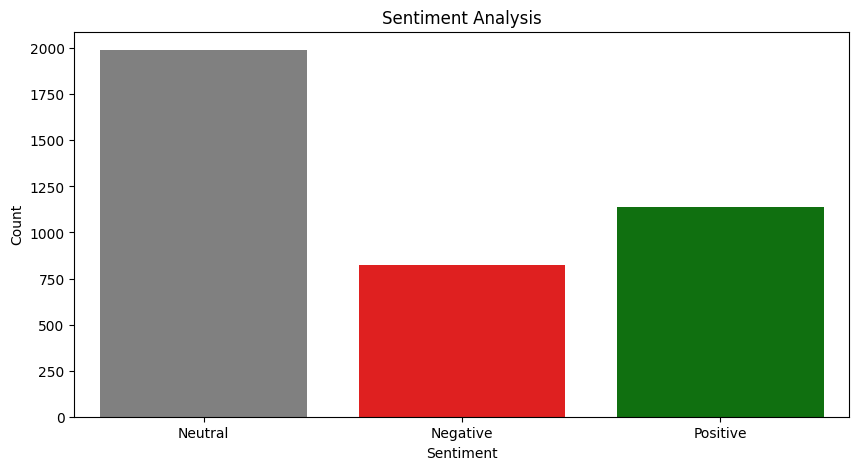

In [ ]:
# Create a good report for the sentiment analysis
# set the figure color
palette_dict = {
    'Negative': 'red',
    'Positive': 'green',
    'Neutral': 'gray'
}

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x='sentiment_dict', data=df, palette=palette_dict)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
# Utilizing NLTK VADER using custom Lexicon

# Download the file into your Colab session
!wget -O _json_sentiwords_id.txt "https://raw.githubusercontent.com/onpilot/sentimen-bahasa/refs/heads/master/leksikon/sentistrength_id/_json_sentiwords_id.txt"

#Create Sentiment Analysis Analyzer
sia2 = SentimentIntensityAnalyzer()

#Cleaning Default Lexicon Provided from VADER
sia2.lexicon.clear()

#Opening Lexicon from sentiwords_id file
with open('/content/_json_sentiwords_id.txt') as f:
    data2 = f.read()

#Updating Lexicon for VADER Analysis from sentiwords_id
senti = json.loads(data2)
sia2.lexicon.update(senti)

#Show Example of Lexicon from sentiwords_id
print(reprlib.repr(sia2.lexicon))

--2025-05-31 18:55:15--  https://raw.githubusercontent.com/onpilot/sentimen-bahasa/refs/heads/master/leksikon/sentistrength_id/_json_sentiwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26666 (26K) [text/plain]
Saving to: ‘_json_sentiwords_id.txt’

_json_sentiwords_id 100%[===================>]  26.04K  --.-KB/s    in 0.005s  

2025-05-31 18:55:15 (5.57 MB/s) - ‘_json_sentiwords_id.txt’ saved [26666/26666]

{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


In [ ]:
#Creating a Function for Sentiment Analysis
def categorize_sentiment_senti(news: str) -> str:
    """
    Categorize the sentiment of a news title as 'Positive', 'Negative', or 'Neutral'
    based on the compound score of a sentiment analyzer (sia2).
    """
    compound_score = sia2.polarity_scores(news)["compound"]

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# Showcase usage with a single sentence and score display
sentence = "IHSG Jatuh, 4 Saham Ini Diam-diam Menggila"
sentiment = categorize_sentiment_senti(sentence)
scores = sia2.polarity_scores(sentence)

print(f"Sentence: {sentence}")
print(f"Sentiment: {sentiment}")
print(f"Scores: {scores}")

Sentence: IHSG Jatuh, 4 Saham Ini Diam-diam Menggila
Sentiment: Negative
Scores: {'neg': 0.533, 'neu': 0.2, 'pos': 0.267, 'compound': -0.6124}


In [ ]:
# Adding a new column for SENTI-based classification labels
df['sentiment_dict'] = df['title'].apply(lambda news: categorize_sentiment_senti(news))
df

,title,publish_date,author,content,keyword,category,source,link,sentiment_dict
0,Wadirut Bank Mandiri Sebut Bisnis Perbankan RI...,2024-02-29 11:58:00,Anisa Indraini -detikFinance,Jakarta\n-\nWakil Direktur Utama PT Bank Mandi...,NPL,detikFinance,detik.com,https://finance.detik.com/moneter/d-7217785/wa...,Neutral
1,Bank Mandiri Jaga Pertumbuhan Aset Pakai Strat...,2025-02-08 11:30:00,"Teti Purwanti,CNBC Indonesia","Jakarta, CNBC Indonesia\n- PT Bank Mandiri (Pe...",NPL,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202502101...,Neutral
2,Investor Waspadalah! Daya Beli Warga RI dalam ...,2024-11-12 06:01:00,"Emanuella Bungasmara Ega Tirta,CNBC Indonesia",Pasar keuangan Indonesia mencatat kinerja meng...,arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024111...,Negative
3,OJK Cabut Izin BPR Kencana Cimahi!,2024-12-17 09:14:00,Herdi Alif Al Hikam -detikFinance,Jakarta\n-\nIzin Usaha PT Bank Perkreditan Rak...,likuiditas bank,detikFinance,detik.com,https://finance.detik.com/moneter/d-7690057/oj...,Neutral
4,"Ramai-Ramai Asing Kabur ke China, Dana Rp 10 T...",2024-09-30 06:20:00,"Revo M,CNBC Indonesia","Jakarta, CNBC Indonesia -\nArus dana asing ter...",arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024092...,Negative
...,...,...,...,...,...,...,...,...,...
3965,"Dolar AS Berada di Zona Merah, Rupiah Berotot",2024-08-29 10:04:00,Sylke Febrina Laucereno -detikFinance,Jakarta\n-\nDolar AS hari ini berada di zona m...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/bursa-dan-valas/d-75...,Neutral
3966,Simak Daftar Kurs Rupiah Hari Ini 24 Januari d...,2025-01-24 10:30:00,"Agustinus Rangga Respati,Aprillia Ika","JAKARTA , KOMPAS.com - Nilai tukar rupiah terh...",nilai tukar rupiah,Kompas.com/Money/Keuangan,kompas.com,http://money.kompas.com/read/2025/01/24/103000...,Positive
3967,Sederet PR Pemerintahan Baru RI di Sektor Ekonomi,2024-05-02 13:25:00,Ilyas Fadilah -detikFinance,Jakarta\n-\nPemerintahan baru Indonesia yang d...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...,Neutral
3968,Industri Penerbangan Indonesia Masih Tidak Bai...,2024-12-31 11:26:00,Heri Purnomo -detikFinance,Jakarta\n-\nIndonesia National Air Carriers As...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/industri/d-7710985/i...,Neutral


<ipython-input-18-8dba32222dfb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_dict', data=df, palette=palette_dict)


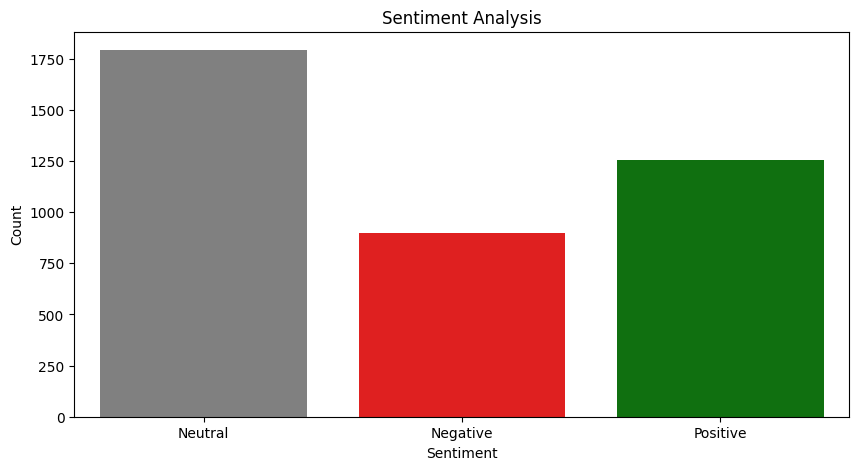

In [ ]:
# Create a good report for the sentiment analysis
# set the figure color
palette_dict = {
    'Negative': 'red',
    'Positive': 'green',
    'Neutral': 'gray'
}

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x='sentiment_dict', data=df, palette=palette_dict)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the plot
plt.show()

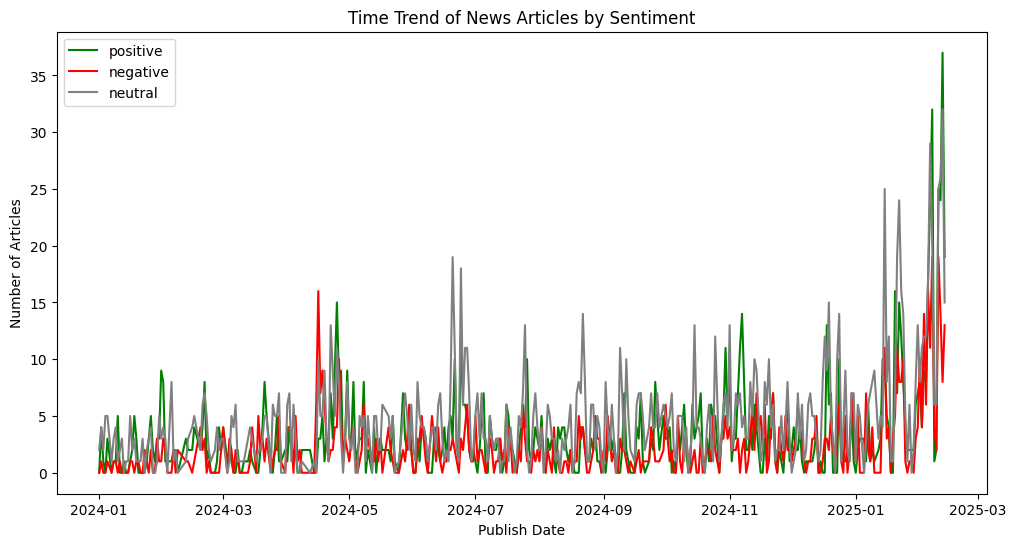

In [ ]:
# Assume your DataFrame is named df and has columns 'publish_date' and 'sentiment'
# Convert the publish_date column to datetime (if not already)
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Group the data by publish date and sentiment, and count the number of articles
# Here, we use daily frequency ('D'); you could also use weekly ('W') or monthly ('M') if you prefer
df_grouped_dict = df.groupby([pd.Grouper(key='publish_date', freq='D'), 'sentiment_dict']).size().reset_index(name='count')

# Pivot the DataFrame so that sentiments become columns
df_pivot = df_grouped_dict.pivot(index='publish_date', columns='sentiment_dict', values='count').fillna(0)

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot.get('Positive', []), label='positive',color='green')
plt.plot(df_pivot.index, df_pivot.get('Negative', []), label='negative',color='red')
plt.plot(df_pivot.index, df_pivot.get('Neutral', []), label='neutral',color='grey')

plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.title('Time Trend of News Articles by Sentiment')
plt.legend()
plt.show()

# Method 2: Using Machine Learning for Sentiment Analysis Classification

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("intanm/indonesian_financial_sentiment_analysis_10")
model = AutoModelForSequenceClassification.from_pretrained("intanm/indonesian_financial_sentiment_analysis_10")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/530 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [ ]:
#Showcasing Results of ML Based Sentiment Analysis
# Label mapping based on model output (adjust if documentation says otherwise)
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Function to predict sentiment for one text
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return label_map[predicted_class]

# Apply sentiment prediction to the DataFrame
df["sentiment_ml_finance"] = df["title"].apply(predict_sentiment)

# Show results
print(df)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


                                                  title        publish_date  \
0     Wadirut Bank Mandiri Sebut Bisnis Perbankan RI... 2024-02-29 11:58:00   
1     Bank Mandiri Jaga Pertumbuhan Aset Pakai Strat... 2025-02-08 11:30:00   
2     Investor Waspadalah! Daya Beli Warga RI dalam ... 2024-11-12 06:01:00   
3                    OJK Cabut Izin BPR Kencana Cimahi! 2024-12-17 09:14:00   
4     Ramai-Ramai Asing Kabur ke China, Dana Rp 10 T... 2024-09-30 06:20:00   
...                                                 ...                 ...   
3965      Dolar AS Berada di Zona Merah, Rupiah Berotot 2024-08-29 10:04:00   
3966  Simak Daftar Kurs Rupiah Hari Ini 24 Januari d... 2025-01-24 10:30:00   
3967  Sederet PR Pemerintahan Baru RI di Sektor Ekonomi 2024-05-02 13:25:00   
3968  Industri Penerbangan Indonesia Masih Tidak Bai... 2024-12-31 11:26:00   
3969  Semester I 2024 IHSG Anjlok, Dana Asing Kabur ... 2024-07-08 16:37:00   

                                             author

<ipython-input-21-0d711db9dfed>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_ml_finance', data=df , palette=palette_ml)


Text(0, 0.5, 'Count')

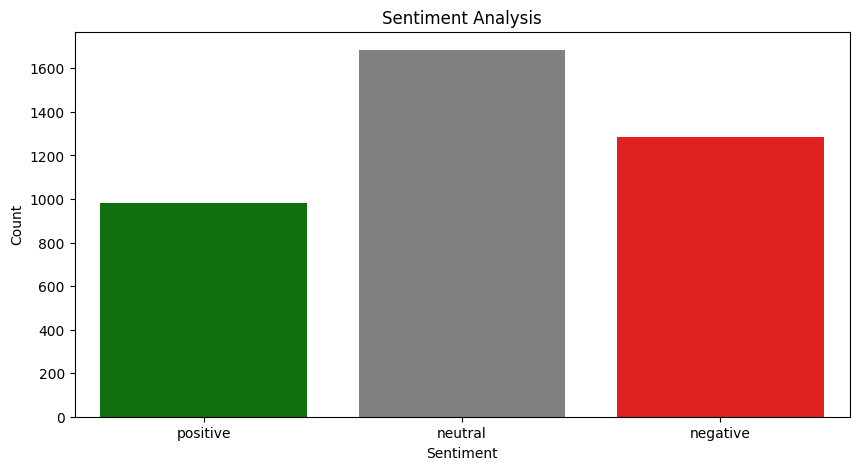

In [ ]:
# Create a good report for the sentiment analysis

import matplotlib.pyplot as plt
import seaborn as sns

# set the figure color
palette_ml = {
    'negative': 'red',
    'positive': 'green',
    'neutral': 'gray'
}

# set the figure size
plt.figure(figsize=(10, 5))

# create a barplot
sns.countplot(x='sentiment_ml_finance', data=df , palette=palette_ml)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the

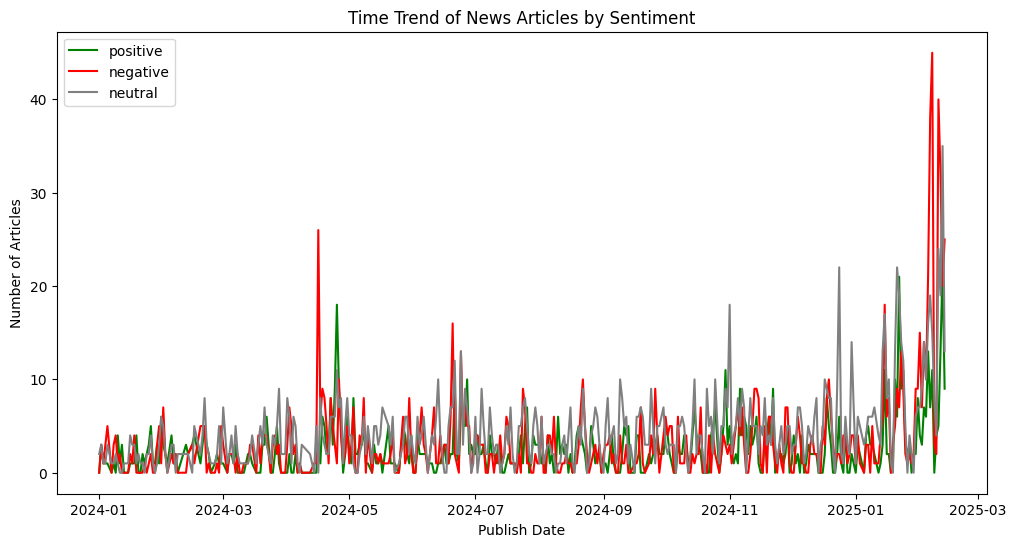

In [ ]:
# Group the data by publish date and sentiment, and count the number of articles
# Here, we use daily frequency ('D'); you could also use weekly ('W') or monthly ('M') if you prefer
df_grouped_ai = df.groupby([pd.Grouper(key='publish_date', freq='D'), 'sentiment_ml_finance']).size().reset_index(name='count')

# Pivot the DataFrame so that sentiments become columns
df_pivot = df_grouped_ai.pivot(index='publish_date', columns='sentiment_ml_finance', values='count').fillna(0)

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot.get('positive', []), label='positive',color='green')
plt.plot(df_pivot.index, df_pivot.get('negative', []), label='negative',color='red')
plt.plot(df_pivot.index, df_pivot.get('neutral', []), label='neutral',color='grey')

plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.title('Time Trend of News Articles by Sentiment')
plt.legend()
plt.show()

In [ ]:
#Saving Sentiment Analysis Data
df.to_csv("/content/news-watch-ihsg.arus modal-sd-2024-01_sentiment.csv", index=True, sep=';') #EDIT: CSV Name

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/news-watch-ihsg.arus modal-sd-2024-01_sentiment.csv", delimiter=";") #EDIT: CSV Name sama as previous code

# Display the DataFrame
display(df)

,Unnamed: 0,title,publish_date,author,content,keyword,category,source,link,sentiment_dict,sentiment_ml_finance
0,0,Wadirut Bank Mandiri Sebut Bisnis Perbankan RI...,2024-02-29 11:58:00,Anisa Indraini -detikFinance,Jakarta\n-\nWakil Direktur Utama PT Bank Mandi...,NPL,detikFinance,detik.com,https://finance.detik.com/moneter/d-7217785/wa...,Neutral,positive
1,1,Bank Mandiri Jaga Pertumbuhan Aset Pakai Strat...,2025-02-08 11:30:00,"Teti Purwanti,CNBC Indonesia","Jakarta, CNBC Indonesia\n- PT Bank Mandiri (Pe...",NPL,Berita Market,cnbcindonesia.com,https://www.cnbcindonesia.com/market/202502101...,Neutral,neutral
2,2,Investor Waspadalah! Daya Beli Warga RI dalam ...,2024-11-12 06:01:00,"Emanuella Bungasmara Ega Tirta,CNBC Indonesia",Pasar keuangan Indonesia mencatat kinerja meng...,arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024111...,Negative,negative
3,3,OJK Cabut Izin BPR Kencana Cimahi!,2024-12-17 09:14:00,Herdi Alif Al Hikam -detikFinance,Jakarta\n-\nIzin Usaha PT Bank Perkreditan Rak...,likuiditas bank,detikFinance,detik.com,https://finance.detik.com/moneter/d-7690057/oj...,Neutral,neutral
4,4,"Ramai-Ramai Asing Kabur ke China, Dana Rp 10 T...",2024-09-30 06:20:00,"Revo M,CNBC Indonesia","Jakarta, CNBC Indonesia -\nArus dana asing ter...",arus modal keluar,Berita Research,cnbcindonesia.com,https://www.cnbcindonesia.com/research/2024092...,Negative,negative
...,...,...,...,...,...,...,...,...,...,...,...
3944,3965,"Dolar AS Berada di Zona Merah, Rupiah Berotot",2024-08-29 10:04:00,Sylke Febrina Laucereno -detikFinance,Jakarta\n-\nDolar AS hari ini berada di zona m...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/bursa-dan-valas/d-75...,Neutral,neutral
3945,3966,Simak Daftar Kurs Rupiah Hari Ini 24 Januari d...,2025-01-24 10:30:00,"Agustinus Rangga Respati,Aprillia Ika","JAKARTA , KOMPAS.com - Nilai tukar rupiah terh...",nilai tukar rupiah,Kompas.com/Money/Keuangan,kompas.com,http://money.kompas.com/read/2025/01/24/103000...,Positive,neutral
3946,3967,Sederet PR Pemerintahan Baru RI di Sektor Ekonomi,2024-05-02 13:25:00,Ilyas Fadilah -detikFinance,Jakarta\n-\nPemerintahan baru Indonesia yang d...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/berita-ekonomi-bisni...,Neutral,neutral
3947,3968,Industri Penerbangan Indonesia Masih Tidak Bai...,2024-12-31 11:26:00,Heri Purnomo -detikFinance,Jakarta\n-\nIndonesia National Air Carriers As...,nilai tukar rupiah,detikFinance,detik.com,https://finance.detik.com/industri/d-7710985/i...,Neutral,negative


In [ ]:
#Try To do Some Tasks
#What time of the day do the articles most come out?

#Provide a Timeline of news articles by Source?

#From which news source does the negative sentiment news come from?
